#                                        Анализ данных сервиса GoFast
Проведем анализ данных сервиса аренды самокатов GoFast.
Чтобы совершать поездки по городу, пользователи сервиса GoFast пользуются мобильным приложением.
Сервисом можно пользоваться:
    
    без подписки
абонентская плата отсутствует; 
стоимость одной минуты поездки — 8 рублей; 
стоимость старта (начала поездки) — 50 рублей;
    
    с подпиской Ultra
абонентская плата — 199 рублей в месяц;
стоимость одной минуты поездки — 6 рублей;
стоимость старта — бесплатно.

В данных есть информация о пользователях, их поездках и подписках.

In [1]:
import pandas as pd                 #библиотека для считывания файлов с данными
import numpy as np                  #библиотека для оругления значений?
import matplotlib.pyplot as plt     #библиотека для графиков
from scipy import stats as st       #библиотека для проверки гипотез

    Шаг 1. Загрузка данных
1.1 Считываем CSV-файлы с данными сервиса аренды самокатов GoFast и сохраняем их в датафреймы

In [2]:
users_go = pd.read_csv('https://code.s3.yandex.net/datasets/users_go.csv')
rides_go = pd.read_csv('https://code.s3.yandex.net/datasets/rides_go.csv')
subscriptions_go = pd.read_csv('https://code.s3.yandex.net/datasets/subscriptions_go.csv')

1.2 Выведим первые строки каждого набора данных и общую информацию о каждом датафрейме.

In [3]:
print(users_go.info())
users_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1565 entries, 0 to 1564
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   user_id            1565 non-null   int64 
 1   name               1565 non-null   object
 2   age                1565 non-null   int64 
 3   city               1565 non-null   object
 4   subscription_type  1565 non-null   object
dtypes: int64(2), object(3)
memory usage: 61.3+ KB
None


,user_id,name,age,city,subscription_type
0,1,Кира,22,Тюмень,ultra
1,2,Станислав,31,Омск,ultra
2,3,Алексей,20,Москва,ultra
3,4,Константин,26,Ростов-на-Дону,ultra
4,5,Адель,28,Омск,ultra
...,...,...,...,...,...
1560,829,Федор,29,Пятигорск,free
1561,809,Юрий,26,Сочи,free
1562,307,Ясмина,19,Краснодар,ultra
1563,47,Юрий,28,Тюмень,ultra


In [4]:
users_go['user_id'].value_counts()

209     2
807     2
611     2
43      2
737     2
       ..
520     1
519     1
518     1
517     1
1534    1
Name: user_id, Length: 1534, dtype: int64

Видим что в датафрейме users_go 1565 строк. Из них уникальных user_id - 1534. значит У некоторых пользователей было по два вида подписок.

In [5]:
print(rides_go.info())
rides_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18068 entries, 0 to 18067
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   user_id   18068 non-null  int64  
 1   distance  18068 non-null  float64
 2   duration  18068 non-null  float64
 3   date      18068 non-null  object 
dtypes: float64(2), int64(1), object(1)
memory usage: 564.8+ KB
None


,user_id,distance,duration,date
0,1,4409.919140,25.599769,2021-01-01
1,1,2617.592153,15.816871,2021-01-18
2,1,754.159807,6.232113,2021-04-20
3,1,2694.783254,18.511000,2021-08-11
4,1,4028.687306,26.265803,2021-08-28
...,...,...,...,...
18063,1534,3781.098080,19.822962,2021-11-04
18064,1534,2840.423057,21.409799,2021-11-16
18065,1534,3826.185507,18.435051,2021-11-18
18066,1534,2902.308661,16.674362,2021-11-27


для удобства сразу округлим значения дистанции до второго знака

In [6]:
rides_go['distance'] = round(rides_go['distance'], 2)

In [7]:
print(subscriptions_go.info())
subscriptions_go

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 4 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   subscription_type  2 non-null      object
 1   minute_price       2 non-null      int64 
 2   start_ride_price   2 non-null      int64 
 3   subscription_fee   2 non-null      int64 
dtypes: int64(3), object(1)
memory usage: 192.0+ bytes
None


,subscription_type,minute_price,start_ride_price,subscription_fee
0,free,8,50,0
1,ultra,6,0,199


Изучили данные в датафреймах
Округли значения дистанции до второго знака
Уникальных user_id - 1534
Всего уникальных поездок - 18068
данные соответствуют типу: object, int64, float64

2.1 Приведим столбец date к типу даты

In [8]:
rides_go['date'] = pd.to_datetime(rides_go['date'], format='%Y-%m-%d')

2.2 Создаем новый столбец с номером месяца на основе столбца date.

In [9]:
rides_go['month'] = rides_go['date'].dt.month

для проверки создадим столбец с годом на основе столбца date. и проверим уникальные значения

In [10]:
rides_go['date'].dt.year.unique()

array([2021])

Убедились что в датафрейме имеются значения только за 2021год

Привели столбец date к типу даты
Создали новый столбец с номером месяца
Убедились что в датафрейме имеются значения только за 2021год

2.3 Проверим наличие дубликатов и пропущенных значений. 

In [11]:
print('дубликатов в rides_go=', rides_go.duplicated().sum())
print('дубликатов в users_go=', users_go.duplicated().sum())
print()
print(rides_go.isna().sum())
print()
print(users_go.isna().sum())

дубликатов в rides_go= 0
дубликатов в users_go= 31

user_id     0
distance    0
duration    0
date        0
month       0
dtype: int64

user_id              0
name                 0
age                  0
city                 0
subscription_type    0
dtype: int64


явных дубликатов - 31,
пропусков нет

Удаляем явные дубликаты

In [12]:
users_go = users_go.drop_duplicates()
print('явных дубликатов в users_go=', users_go.duplicated().sum())

явных дубликатов в users_go= 0


In [13]:
users_go.columns

Index(['user_id', 'name', 'age', 'city', 'subscription_type'], dtype='object')

проверяем неявные дубликаты где это необходимо

In [14]:
print(users_go['name'].sort_values().unique())
print(users_go['city'].sort_values().unique())
print(users_go['subscription_type'].sort_values().unique())

['Агата' 'Аделина' 'Адель' 'Айдар' 'Александр' 'Александра' 'Алексей'
 'Алина' 'Алиса' 'Алия' 'Алла' 'Альберт' 'Альбина' 'Алёна' 'Амалия'
 'Амина' 'Амир' 'Анастасия' 'Анатолий' 'Ангелина' 'Андрей' 'Анжелика'
 'Анна' 'Антон' 'Антонина' 'Ариана' 'Арина' 'Арсен' 'Арсений' 'Артемий'
 'Артур' 'Артём' 'Богдан' 'Борис' 'Вадим' 'Валентина' 'Валерий' 'Валерия'
 'Варвара' 'Василий' 'Василина' 'Василиса' 'Вера' 'Вероника' 'Виктор'
 'Виктория' 'Виолетта' 'Виталий' 'Виталина' 'Влад' 'Влада' 'Владимир'
 'Владислав' 'Владислава' 'Всеволод' 'Вячеслав' 'Галина' 'Георгий'
 'Герман' 'Глеб' 'Гордей' 'Григорий' 'Давид' 'Дамир' 'Даниил' 'Данил'
 'Данила' 'Даниэль' 'Дарина' 'Дарья' 'Демид' 'Денис' 'Диана' 'Дмитрий'
 'Ева' 'Евгений' 'Евгения' 'Егор' 'Екатерина' 'Елена' 'Елизавета' 'Елисей'
 'Есения' 'Жанна' 'Зарина' 'Захар' 'Злата' 'Иван' 'Игнат' 'Игорь' 'Ильдар'
 'Илья' 'Инна' 'Ирина' 'Камилла' 'Карина' 'Каролина' 'Кира' 'Кирилл'
 'Константин' 'Кристина' 'Ксения' 'Лариса' 'Лев' 'Леонид' 'Лиана' 'Лидия'
 'Лил

неявных дубликатов нет

Проверили наличие пропусков,
Проверили наличие неявных дубликатов,
Удалили явные дубликаты 

Шаг 3. Исследовательский анализ данных

3.1 частота встречаемости городов

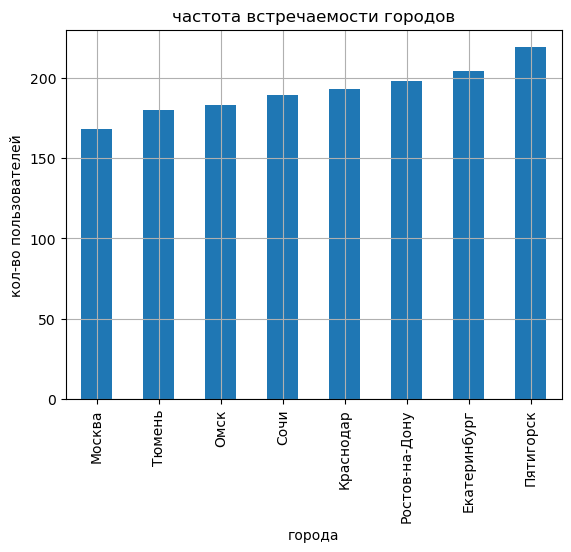

In [15]:
(users_go['city']
    .value_counts(ascending=True)
    .plot.bar(grid=True, title='частота встречаемости городов'))
plt.xlabel("города")
plt.ylabel("кол-во пользователей")
plt.show()

In [16]:
print('количество пользователей в каждом городе:')
users_go['city'].value_counts()

количество пользователей в каждом городе:


Пятигорск         219
Екатеринбург      204
Ростов-на-Дону    198
Краснодар         193
Сочи              189
Омск              183
Тюмень            180
Москва            168
Name: city, dtype: int64

3.2 график для типов подписки

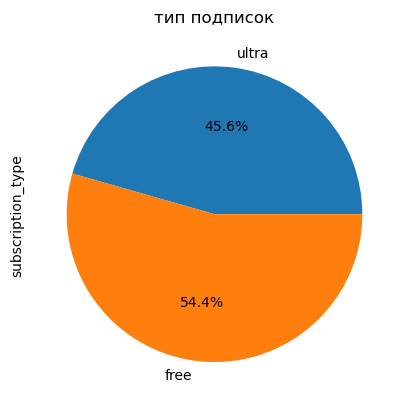

In [17]:
(users_go['subscription_type']
    .value_counts(ascending=True)
    .plot(kind='pie', grid=True, title='тип подписок', autopct='%1.1f%%'))

plt.show()

In [18]:
print('количество пользователей с подпиской и без подписки')
print('где free - без подписки ')
print('    ultra - с подпиской ')
users_go['subscription_type'].value_counts()

количество пользователей с подпиской и без подписки
где free - без подписки 
    ultra - с подпиской 


free     835
ultra    699
Name: subscription_type, dtype: int64

In [19]:
#pivot_subscription_type = users_go.pivot_table(index=['subscription_type'], values='subscription_type', aggfunc='count')*100
#subscription_grouped = users_go.groupby('subscription_type')
#subscription_grouped

3.3 возраст пользователей

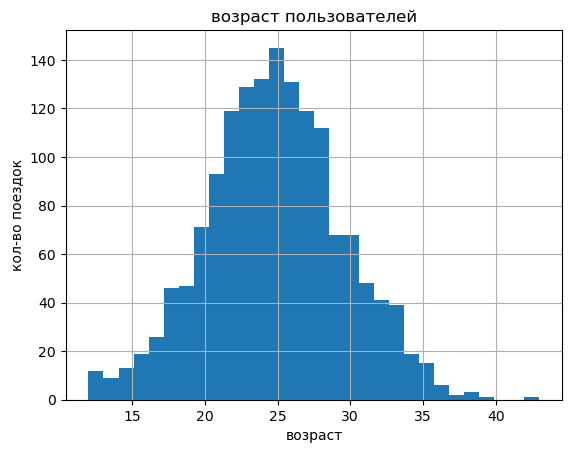

count    1534.000000
mean       24.903520
std         4.572367
min        12.000000
25%        22.000000
50%        25.000000
75%        28.000000
max        43.000000
Name: age, dtype: float64

In [20]:
users_go['age'].plot(kind='hist', bins=30, title='возраст пользователей', grid=True)
plt.xlabel("возраст")
plt.ylabel("кол-во поездок")
plt.show()
users_go['age'].describe()

In [21]:
users_go['age'].mode()

0    25
Name: age, dtype: int64

Средний возраст пользователей - 25 лет.
Медиана возраста - 25 лет
Мода возраста - 25 лет

3.4 расстояние, которое пользователь преодолел за одну поездку

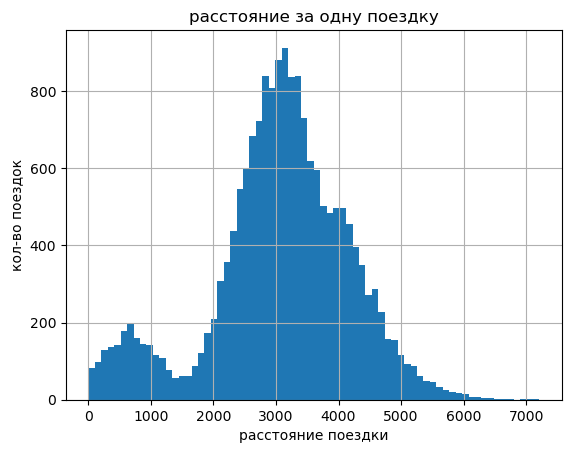

count    18068.000000
mean      3070.659992
std       1116.831222
min          0.860000
25%       2543.227500
50%       3133.610000
75%       3776.220000
max       7211.010000
Name: distance, dtype: float64

In [22]:
rides_go['distance'].plot(kind='hist', bins=70, title='расстояние за одну поездку', grid=True)
plt.xlabel("расстояние поездки")
plt.ylabel("кол-во поездок")
plt.show()
rides_go['distance'].describe()

среднее растояние которое проезжают пользователи = 3070м
медиана = 3133м

видим два пика!
гипотезы:

     первый пик: - пользователи которые берут самокат на небольшие поездки до дома итд
                 - пользователи берут самокат по будням
                 
     второй пик: - пользователи берут самокат по выходным
     
разница в пиках: - пользователи которые берут самокаты с подпиской и без подписки
                 - возможно зависит от месяца(начало или конец сезона) когда уже прохладно чтобы долго кататься или наоборот лето когда тепло и долго катаются
                 - возможно зависит от возраста пользователей
     

3.5 продолжительность поездок.

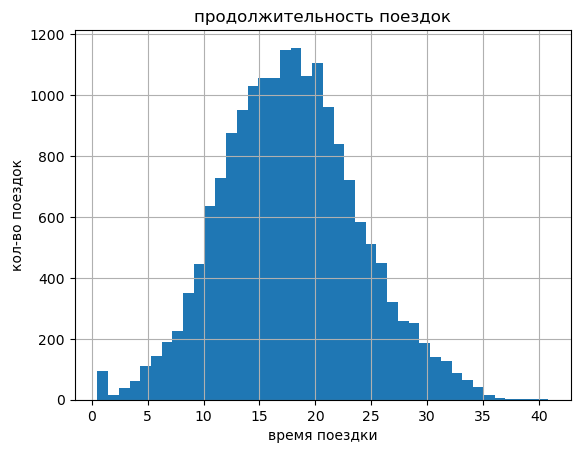

count    18068.000000
mean        17.805011
std          6.091051
min          0.500000
25%         13.597563
50%         17.678395
75%         21.724800
max         40.823963
Name: duration, dtype: float64

In [23]:
rides_go['duration'].plot(kind='hist', bins=42, title='продолжительность поездок', grid=True)
plt.xlabel("время поездки")
plt.ylabel("кол-во поездок")
plt.show()
rides_go['duration'].describe()

Проверим Аномальный пик выброса в районе 0 минут
Делаем срез Где время поездки <= 1 минуты

In [24]:
duration_05 = rides_go.query('duration <= 1')
duration_05 #срез с данными где время меньше 1 мин

,user_id,distance,duration,date,month
6531,701,4196.45,0.5,2021-08-31,8
6570,704,4830.82,0.5,2021-10-14,10
6680,712,4684.00,0.5,2021-03-04,3
6695,713,5215.64,0.5,2021-02-25,2
6768,718,5197.44,0.5,2021-02-11,2
...,...,...,...,...,...
17004,1460,5531.34,0.5,2021-01-19,1
17242,1477,6724.93,0.5,2021-01-12,1
17314,1483,4445.48,0.5,2021-03-06,3
17505,1496,5722.55,0.5,2021-02-14,2


видим Что имеется 95 аномальных значений
при заполнении данных возможно произошла ошибка так как время поездки не может быть меньше 1 минуты, а также не возможно за 30 секунд проехать такое большое растояние равное 4000м и больше

Заменим время = 0.5 минут на среднее время исходя из расстояния в датафрейме

Проверим расстоянием которое проезжали пользователя у которых время = 0.5

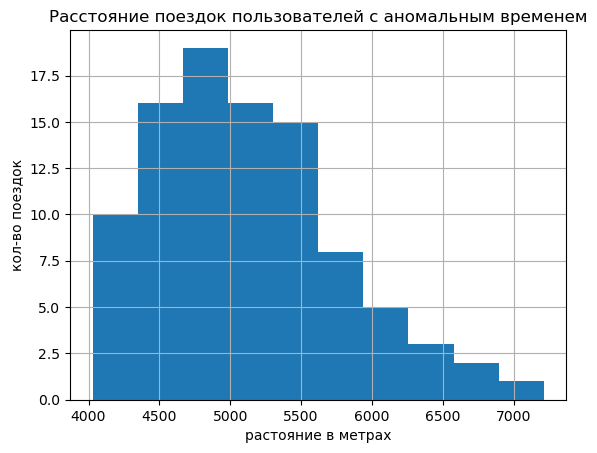

In [25]:
duration_05['distance'].plot(kind='hist', title='Расстояние поездок пользователей с аномальным временем', grid=True)
plt.xlabel("растояние в метрах")
plt.ylabel("кол-во поездок")
plt.show()

Видим что Пользаватели проезжали от 4000 до 7000 м

- делаем срез данных по параметрам время больше 1 минуты и расстояние от 4000 до 7000 м 
- и Считаем среднее время поездки для пользователей которые проезжали от 4000 до 7000 м 

In [26]:
distance_05 = rides_go.query('duration >= 1 and distance >= 4000 and distance <=7000')
duration_05_mean = round(distance_05['duration'].mean(), 2)
print('среднее время поездки 4000-7000 м =', duration_05_mean)

среднее время поездки 4000-7000 м = 22.17


заменим значение времени 0.5 на среднее время поездки 4000-7000 м

In [27]:
for duration in rides_go['duration']:
    rides_go.loc[(rides_go['duration'] == duration) & (rides_go['duration'] == 0.5), 'duration'] = duration_05_mean

снова проверим наличие аномальных значений времени 

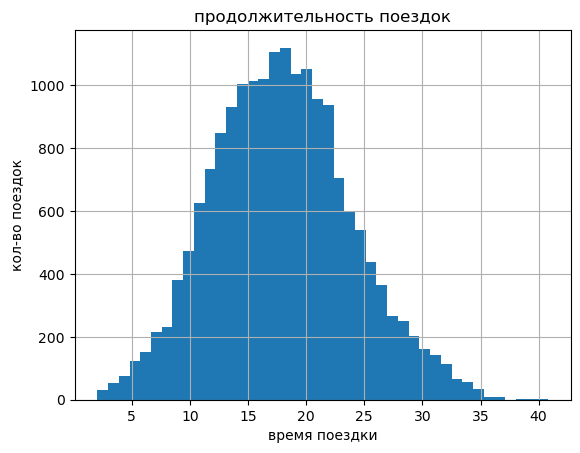

In [28]:
rides_go['duration'].plot(kind='hist', bins=42, title='продолжительность поездок', grid=True)
plt.xlabel("время поездки")
plt.ylabel("кол-во поездок")
plt.show()

Заменили аномальные значения времени на среднее время для данных растояний

4.1 Объединяем данные о пользователях, поездках и подписках в один датафрейм.

In [29]:
data = users_go.merge(rides_go, on='user_id', how='left')
data = data.merge(subscriptions_go, on='subscription_type', how='left')
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,25.599769,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,15.816871,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,6.232113,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,18.511000,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,26.265803,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,19.822962,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,21.409799,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,18.435051,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,16.674362,2021-11-27,11,8,50,0


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18068 entries, 0 to 18067
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   user_id            18068 non-null  int64         
 1   name               18068 non-null  object        
 2   age                18068 non-null  int64         
 3   city               18068 non-null  object        
 4   subscription_type  18068 non-null  object        
 5   distance           18068 non-null  float64       
 6   duration           18068 non-null  float64       
 7   date               18068 non-null  datetime64[ns]
 8   month              18068 non-null  int64         
 9   minute_price       18068 non-null  int64         
 10  start_ride_price   18068 non-null  int64         
 11  subscription_fee   18068 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int64(6), object(3)
memory usage: 1.8+ MB


проверили количество строк после соединения таблиц = 18068, все данные на месте ничего не потнрялось и не добавилось лишнего

каждое значение из столбца duration округляется с помощью «потолка»: 

In [31]:
data['duration'] = np.ceil(data['duration'])
data

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17.0,2021-11-27,11,8,50,0


4.2 Создадим ещё два датафрейма из датафрейма, созданного на этапе 4.1:

4.2.1 данныe о пользователях 'с подпиской'

In [32]:
data_ultra = data.query('subscription_type == "ultra"')
data_ultra

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
0,1,Кира,22,Тюмень,ultra,4409.92,26.0,2021-01-01,1,6,0,199
1,1,Кира,22,Тюмень,ultra,2617.59,16.0,2021-01-18,1,6,0,199
2,1,Кира,22,Тюмень,ultra,754.16,7.0,2021-04-20,4,6,0,199
3,1,Кира,22,Тюмень,ultra,2694.78,19.0,2021-08-11,8,6,0,199
4,1,Кира,22,Тюмень,ultra,4028.69,27.0,2021-08-28,8,6,0,199
...,...,...,...,...,...,...,...,...,...,...,...,...
6495,699,Оксана,22,Москва,ultra,3973.05,25.0,2021-08-29,8,6,0,199
6496,699,Оксана,22,Москва,ultra,3288.70,16.0,2021-09-12,9,6,0,199
6497,699,Оксана,22,Москва,ultra,3076.16,15.0,2021-09-26,9,6,0,199
6498,699,Оксана,22,Москва,ultra,4707.85,16.0,2021-10-17,10,6,0,199


4.2.2 данныe о пользователях 'без подписки'

In [33]:
data_free = data.query('subscription_type == "free"')
data_free

,user_id,name,age,city,subscription_type,distance,duration,date,month,minute_price,start_ride_price,subscription_fee
6500,700,Айдар,22,Омск,free,2515.69,15.0,2021-01-02,1,8,50,0
6501,700,Айдар,22,Омск,free,846.93,17.0,2021-02-01,2,8,50,0
6502,700,Айдар,22,Омск,free,4004.43,21.0,2021-02-04,2,8,50,0
6503,700,Айдар,22,Омск,free,1205.91,10.0,2021-02-10,2,8,50,0
6504,700,Айдар,22,Омск,free,3047.38,18.0,2021-02-14,2,8,50,0
...,...,...,...,...,...,...,...,...,...,...,...,...
18063,1534,Альберт,25,Краснодар,free,3781.10,20.0,2021-11-04,11,8,50,0
18064,1534,Альберт,25,Краснодар,free,2840.42,22.0,2021-11-16,11,8,50,0
18065,1534,Альберт,25,Краснодар,free,3826.19,19.0,2021-11-18,11,8,50,0
18066,1534,Альберт,25,Краснодар,free,2902.31,17.0,2021-11-27,11,8,50,0


4.3.1 продолжительность поездок пользователей 'с подпиской' и 'без подписки'

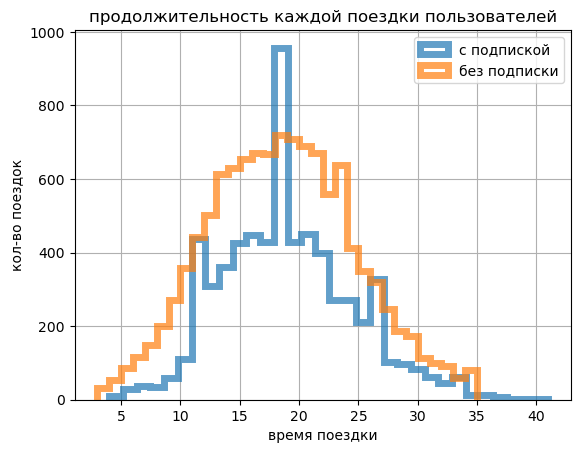

с подпиской count    6500.000000
mean       19.037692
std         5.577439
min         4.000000
25%        15.000000
50%        19.000000
75%        22.000000
max        41.000000
Name: duration, dtype: float64

без подписки count    11568.000000
mean        18.071663
std          6.157156
min          3.000000
25%         14.000000
50%         18.000000
75%         22.000000
max         35.000000
Name: duration, dtype: float64


In [34]:
data_ultra['duration'].plot(
    kind='hist', 
    bins=32,
    histtype='step',
    linewidth=5,
    alpha=0.7, 
    label='с подпиской',
    legend=True,)

data_free['duration'].plot(
    kind='hist', 
    bins=32,
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='без подписки',
    legend=True,
    grid=True)

plt.xlabel("время поездки")
plt.ylabel("кол-во поездок")
plt.title('продолжительность каждой поездки пользователей')
plt.show()

print('с подпиской', data_ultra['duration'].describe())
print()
print('без подписки', data_free['duration'].describe())

- Среднее и медиана времени поездок пользователей с подпиской и без подписки равны 19 и 18 минутам соотв.



***не понимаю мне кажется что графики похожи (различается только в количестве выборки тк данных без подписки в 2 раза больше) и средние в целом тоже одинаковы! правильно ли я думаю?

4.3.2 расстояние, которое пользователь преодолел за одну поездку 'с подпиской' и 'без подписки'

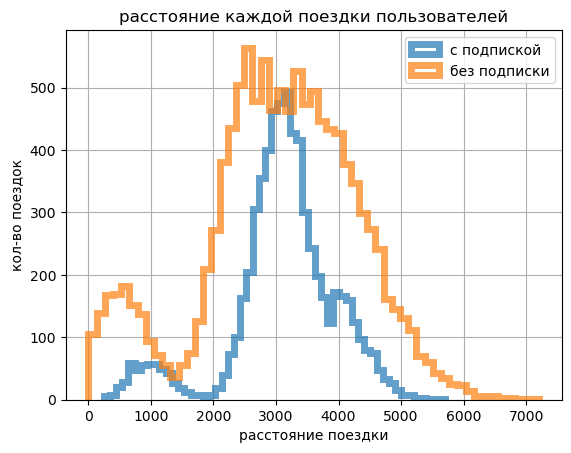

расстояние с подпиской count    6500.000000
mean     3115.445431
std       836.895369
min       244.210000
25%      2785.447500
50%      3148.640000
75%      3560.577500
max      5699.770000
Name: distance, dtype: float64

расстояние без подписки count    11568.000000
mean      3045.495284
std       1246.173810
min          0.860000
25%       2366.560000
50%       3114.650000
75%       3905.695000
max       7211.010000
Name: distance, dtype: float64


In [35]:
data_ultra['distance'].plot(
    kind='hist', 
    bins=55, 
    histtype='step',
    linewidth=5,
    alpha=0.7, 
    label='с подпиской',
    legend=True,)

data_free['distance'].plot(
    kind='hist', 
    bins=55,
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='без подписки',
    legend=True,
    grid=True)

plt.xlabel("расстояние поездки")
plt.ylabel("кол-во поездок")
plt.title('расстояние каждой поездки пользователей')
plt.show()

print('расстояние с подпиской', data_ultra['distance'].describe())
print()
print('расстояние без подписки', data_free['distance'].describe())

в среднем пользователи с подпиской и без проезжают одинаковое растояние равное 3100м

****тут в такая же ситуация, вроде пользователи одинаково ездят! единственное первый пик у пользователей без подписки смещен левее значит они проезжают немного меньше.

дальше я попытался разобраться что это за первый пик, но закономерности не увидел.
думал может это зависит из-за города, месяца или возраста.

In [36]:
#pik1 = data.query('distance < 1500')
#pik1

#print(data['city'].value_counts())
#print()
#print(pik1['city'].value_counts())
#print(data['month'].value_counts())
#print()
#print(pik1['month'].value_counts())
#print(data['age'].value_counts())
#print()
#print(pik1['age'].value_counts())

5.1 датафрейм с агрегированными данными о поездках: 
суммарное расстояние, количество поездок и суммарное время для каждого пользователя за каждый месяц

In [37]:
data_sum = (data.groupby(['user_id','month'])
    .agg({'duration':'sum', 'distance':['sum','count'],'minute_price':'first', 
        'start_ride_price': 'first', 'subscription_fee': 'first', 'subscription_type': 'first','city': 'first', 
        'age':'first', 'name':'first', 'date':'first'}))

data_sum.head(10)

duration  distance       minute_price start_ride_price  \
                   sum       sum count        first            first   
user_id month                                                          
1       1         42.0   7027.51     2            6                0   
        4          7.0    754.16     1            6                0   
        8         46.0   6723.47     2            6                0   
        10        32.0   5809.91     2            6                0   
        11        56.0   7003.50     3            6                0   
        12        28.0   6751.63     2            6                0   
2       3         63.0  10187.73     3            6                0   
        4         40.0   6164.39     2            6                0   
        6         14.0   3255.34     1            6                0   
        7         48.0   6780.73     2            6                0   

              subscription_fee subscription_type    city   age       name  \
                         first             first   first first      first   
user_id month                                                               
1       1                  199             ultra  Тюмень    22       Кира   
        4                  199             ultra  Тюмень    22       Кира   
        8                  199             ultra  Тюмень    22       Кира   
        10                 199             ultra  Тюмень    22       Кира   
        11                 199             ultra  Тюмень    22       Кира   
        12                 199             ultra  Тюмень    22       Кира   
2       3                  199             ultra    Омск    31  Станислав   
        4                  199             ultra    Омск    31  Станислав   
        6                  199             ultra    Омск    31  Станислав   
        7                  199             ultra    Омск    31  Станислав   

                    date  
                   first  
user_id month             
1       1     2021-01-01  
        4     2021-04-20  
        8     2021-08-11  
        10    2021-10-09  
        11    2021-11-06  
        12    2021-12-14  
2       3     2021-03-15  
        4     2021-04-08  
        6     2021-06-20  
        7     2021-07-02

In [38]:
data_sum.columns

MultiIndex([(         'duration',   'sum'),
            (         'distance',   'sum'),
            (         'distance', 'count'),
            (     'minute_price', 'first'),
            ( 'start_ride_price', 'first'),
            ( 'subscription_fee', 'first'),
            ('subscription_type', 'first'),
            (             'city', 'first'),
            (              'age', 'first'),
            (             'name', 'first'),
            (             'date', 'first')],
           )

Переименовываем Столбцы

In [39]:
data_sum.columns = ['duration_sum', 'distance_sum', 'rides_count', 'minute_price', 'start_ride_price', 'subscription_fee', 'subscription_type', 'city', 'age', 'name', 'date']

5.2 добавляем столбец с помесячной выручкой, которую принёс каждый пользователь.

Помесячная выручка считается по формуле: 
- стоимость старта поездки × количество поездок + стоимость одной минуты поездки × общая продолжительность всех поездок в минутах + стоимость подписки.

In [40]:
data_sum['revenue_m'] = (data_sum['start_ride_price'] * data_sum['rides_count'] 
    + data_sum['minute_price'] * data_sum['duration_sum'] + data_sum['subscription_fee'])

#сбросим индекс 'user_id'
data_sum = data_sum.reset_index()
data_sum

,user_id,month,duration_sum,distance_sum,rides_count,minute_price,start_ride_price,subscription_fee,subscription_type,city,age,name,date,revenue_m
0,1,1,42.0,7027.51,2,6,0,199,ultra,Тюмень,22,Кира,2021-01-01,451.0
1,1,4,7.0,754.16,1,6,0,199,ultra,Тюмень,22,Кира,2021-04-20,241.0
2,1,8,46.0,6723.47,2,6,0,199,ultra,Тюмень,22,Кира,2021-08-11,475.0
3,1,10,32.0,5809.91,2,6,0,199,ultra,Тюмень,22,Кира,2021-10-09,391.0
4,1,11,56.0,7003.50,3,6,0,199,ultra,Тюмень,22,Кира,2021-11-06,535.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11326,1534,6,26.0,3409.47,2,8,50,0,free,Краснодар,25,Альберт,2021-06-11,308.0
11327,1534,8,48.0,7622.45,2,8,50,0,free,Краснодар,25,Альберт,2021-08-08,484.0
11328,1534,9,23.0,4928.17,1,8,50,0,free,Краснодар,25,Альберт,2021-09-13,234.0
11329,1534,11,78.0,13350.02,4,8,50,0,free,Краснодар,25,Альберт,2021-11-04,824.0


Посчитали помесячную выручку и поместили ее в колонку "revenue_m"

Шаг 6. Проверка гипотез

задание 6.1 Важно понять, тратят ли пользователи с подпиской больше времени на поездки? Если да, то пользователи с подпиской могут быть «выгоднее» для компании. Проверьте гипотезу. Используйте исходные данные о продолжительности каждой сессии — отдельно для подписчиков и тех, у кого нет подписки.

6.1 проверяем гипотезу тратят ли пользователи с подпиской больше времени на поездки?

проверяем возможные выбросы

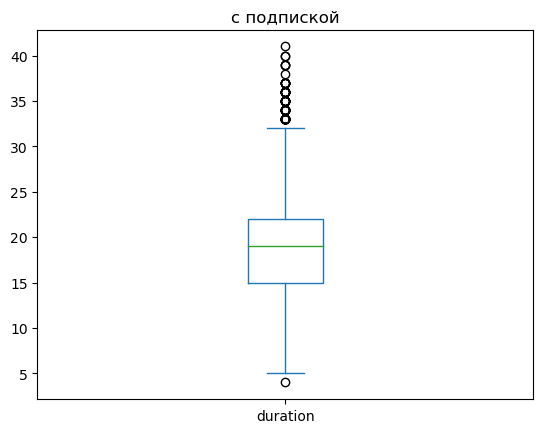

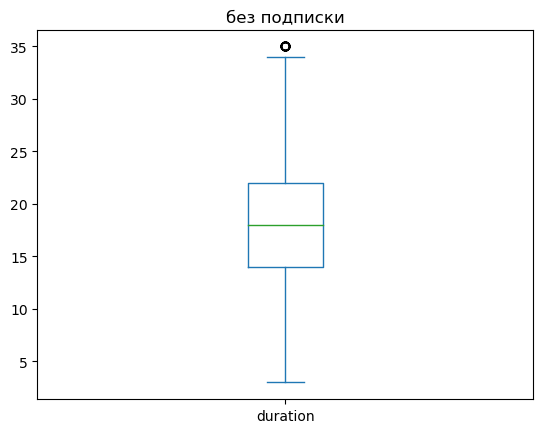

In [41]:
data_ultra['duration'].plot.box(title='c подпиской')
plt.show()
data_free['duration'].plot.box(title='без подписки')
plt.show()

В пункте 4.3.1 можно увидеть что среднее время поездок пользователей с подпиской и без подписок составляют 19 и 18 мин.

Проведем одностороний т-тест

Нулевая гипотеза: средние значения время пользования без подписки и с подпиской равны.

Альтернативная гипотеза: среднее значение время пользования без подписки меньше, чем среднее значение времени пользования с подпиской

In [42]:
alpha = 0.05

results = st.ttest_ind(data_free['duration'], data_ultra['duration'], alternative='less', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 3.417395152036376e-27
Отвергаем нулевую гипотезу


Полученное значение p-value меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу. Есть основания говорить, что пользователи с подпиской дольше катаются на самокате

среднее и медиана для категорий пользователей по возрасту, городу и месяцу

In [43]:
pivot_age = data.pivot_table(index=['age'], values='duration', aggfunc=['mean', 'median'])
print('по возрасту')
print(pivot_age)
pivot_city = data.pivot_table(index=['city'], values='duration', aggfunc=['mean', 'median'])
print('по городу')
print(pivot_city)
pivot_month = data.pivot_table(index=['month'], values='duration', aggfunc=['mean', 'median'])
print('по месяцу')
print(pivot_month)

по возрасту
          mean   median
      duration duration
age                    
12   19.291667     18.0
13   18.945652     19.0
14   18.643478     18.0
15   19.162162     19.0
16   18.380753     19.0
17   18.706587     18.0
18   18.328063     18.0
19   18.586207     18.0
20   18.438026     18.0
21   18.321672     18.0
22   18.190818     18.0
23   18.448276     18.0
24   18.477971     18.0
25   18.353638     18.0
26   18.504321     18.0
27   18.371235     18.0
28   18.518237     18.0
29   18.195122     18.0
30   18.326557     18.0
31   18.580702     18.0
32   18.343096     18.0
33   18.631702     18.0
34   18.724444     19.0
35   18.368421     18.0
36   16.942529     16.0
37   18.115385     17.5
38   20.692308     20.0
39   17.055556     16.0
43   18.125000     18.5
по городу
                     mean   median
                 duration duration
city                              
Екатеринбург    18.401463     18.0
Краснодар       18.324207     18.0
Москва          18.686400     19.0


6.2 Расстояние одной поездки в 3130 метров — оптимальное с точки зрения износа самоката. Можно ли сказать, что среднее расстояние, которое проезжают пользователи с подпиской за одну поездку, не превышает 3130 метров? Проверьте гипотезу и сделайте выводы.

в пункте 4.3.2 можно увидеть расстояние, которое пользователь преодолел за одну поездку 'с подпиской' а также среднее = 3115м и медеану = 3148м

проверим наличие возможных выбросов

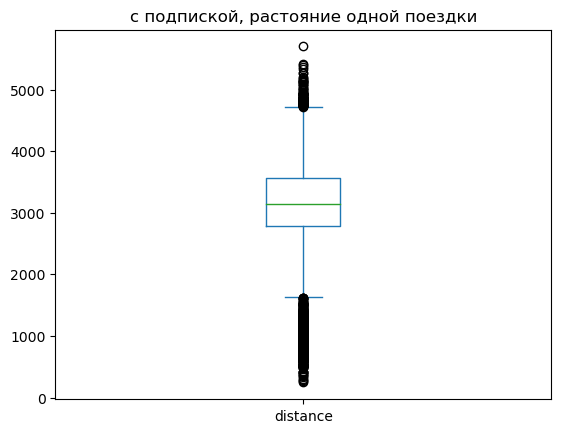

In [44]:
data_ultra['distance'].plot.box(title='c подпиской, растояние одной поездки')
plt.show()

проведем одностороний т-тест 

Нулевая гипотеза: пользователи с подпиской проезжают за одну поездку 3130 метров

Альтернативная гипотеза: пользователи проезжают больше 3130 метров

In [45]:
distanse_value = 3130

alpha = 0.05 # уровень статистической значимости

result = st.ttest_1samp(data_ultra['distance'], distanse_value, alternative='greater')

print('p-значение:', result.pvalue)

if (result.pvalue < alpha):
    print('Отвергаем нулевую гипотезу')
else:
    print('Не отвергаем нулевую гипотезу')

p-значение: 0.9195362605842414
Не отвергаем нулевую гипотезу


Нет основания отвергать нулевую гипотезу

Есть основания говорить, что многие пользователи с подпиской проезжают 3130 метров, не отвергаем в пользу альтернативной, потому что p-value явно выше любых разумных порогов, чтобы отвергать нулевую гипотезу.

***правильно я тут интерпретировал? нашел анологичный пример в теории и из интерактивного тренаженажера. хотя из теории не особо точно понял , буду благодарен если подскажешь где более наглядно посмотеть чтобы лучше понять)

6.3 
Проверим гипотезу о том, будет ли помесячная выручка от пользователей с подпиской по месяцам выше, чем выручка от пользователей без подписки.

Данныe о пользователях 'с подпиской' суммированая таблица!

In [46]:
data_ultra2 = data_sum.query('subscription_type == "ultra"')

данныe о пользователях 'без подписки' суммированая таблица!

In [47]:
data_free2 = data_sum.query('subscription_type == "free"')

строим гистограммы для помесячной выручки

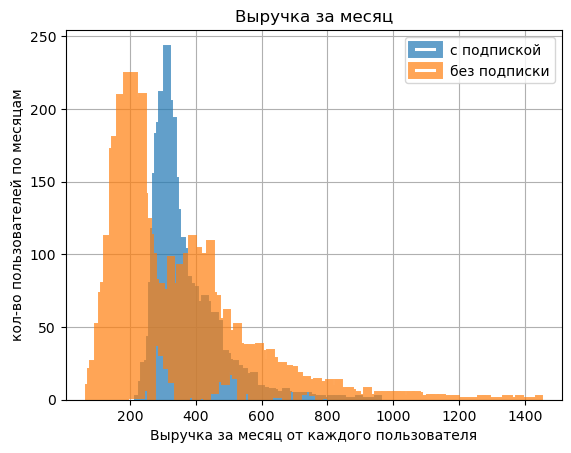

Выручка с подпиской count    4533.000000
mean      362.792191
std        88.262737
min       223.000000
25%       301.000000
50%       337.000000
75%       409.000000
max       955.000000
Name: revenue_m, dtype: float64

Выручка без подписки count    6798.000000
mean      331.100912
std       184.461981
min        74.000000
25%       194.000000
50%       274.000000
75%       428.000000
max      1444.000000
Name: revenue_m, dtype: float64


In [48]:
data_ultra2['revenue_m'].plot(
    kind='hist', 
    bins=250, 
    histtype='step',
    linewidth=5,
    alpha=0.7, 
    label='с подпиской',
    legend=True,)

data_free2['revenue_m'].plot(
    kind='hist', 
    bins=250,
    histtype='step',
    linewidth=5,
    alpha=0.7,
    label='без подписки',
    legend=True,
    grid=True)

plt.xlabel("Выручка за месяц от каждого пользователя")
plt.ylabel("кол-во пользователей по месяцам")
plt.title('Выручка за месяц')
plt.show()

print('Выручка с подпиской', data_ultra2['revenue_m'].describe())
print()
print('Выручка без подписки', data_free2['revenue_m'].describe())

- Средняя выручка от пользователей с подпиской за месяц = 362.79, медиана = 337.00.
- Средняя выручка от пользователей без подписки за месяц = 331.10, медиана = 274.00.

Проведем одностороний т-тест

Нулевая гипотеза: среднее значение выручки от пользователей с подпиской  и без подписки одинаковы за месяц

Альтернативная гипотеза: за месяц среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки

In [49]:
alpha = 0.05

results = st.ttest_ind(data_ultra2['revenue_m'], data_free2['revenue_m'],
                       alternative='greater', equal_var=False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

p-значение: 2.0386205420622812e-34
Отвергаем нулевую гипотезу


Полученное значение p-value (~2.0386205420622812e-34) меньше заданного уровня значимости, поэтому можно отвергнуть нулевую гипотезу о том что за месяц среднее значение выручки от пользователей с подпиской равна среднему значению выручки от пользователей без подписки

Есть основания говорить, что по альтернативной гипотезе за месяц среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки

6.4 
Представьте такую ситуацию: техническая команда сервиса обновила сервера, с которыми взаимодействует мобильное приложение. Она надеется, что из-за этого количество обращений в техподдержку значимо снизилось. Некоторый файл содержит для каждого пользователя данные о количестве обращений до обновления и после него. Какой тест вам понадобился бы для проверки этой гипотезы?

ответ:
Нам понадобится проверить Гипотезу о равенстве средних для зависимых (парных) выборок
и тест 'st.ttest_rel'


print('Среднее количестве обращений до обновления:', pd.Series(before).mean())
print('Среднее количестве обращений после обновления:', pd.Series(after).mean())

alpha = 0.05 # уровень статистической значимости

results = st.ttest_rel(before, after, alternative='greater') # тест правостороний тк проверяем что раньше было больше обращений чем сейчас

#полученное p-значение
print('p-значение:', results.pvalue)

if results.pvalue < alpha: # сравните p-значение с заданным уровнем стат. значимости
    print('Отвергаем нулевую гипотезу о равенстве среднего')
else:
    print('Не получилось отвергнуть нулевую гипотезу о равенстве среднего числа')

- На данный момент пользователей без подписки (54,4%) больше чем пользователей с подпиской (45,6%)
- Средний возраст пользователей - 25 лет.
- в среднем пользователи с подпиской и без проезжают растояние равное 3115м и 3045м соотв.
на основании теста можно сказать, что пользователи с подпиской проезжают за одну поездку, в среднем не больше 3130 метров

- Среднее и медиана времи поездок пользователей с подпиской и без подписки равны 19 и 18 минутам соответственно.
на основании теста можно сказать, что пользователи с подпиской дольше катаются на самокате чем пользователи без подписки

- Посчитали помесячную выручку для каждого пользователя
Есть основания на основе теста говорить, что за месяц среднее значение выручки от пользователей с подпиской больше, чем среднее значение выручки от пользователей без подписки
